In [7]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [8]:
FIGS="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"
#combo data
COMBO_DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/combo2"
pref=COMBO_DATA+'/Baf.combo'
adata=sc.read(pref+'.analysis.h5ad')
adata

Only considering the two last: ['.analysis', '.h5ad'].
Only considering the two last: ['.analysis', '.h5ad'].


AnnData object with n_obs × n_vars = 7889 × 20018
    obs: 'n_genes', 'batch', 'SMARCE1_1', 'DPF2_4', 'BCL7C_2', 'ARID2_1', 'NTC7_IG1144056', 'PHF10_1', 'SMARCA2_4', 'BCL7B_1', 'SMARCB1_5', 'ARID1B_4', 'NTC6_IG1216445', 'NTC1_IG345439', 'PBRM1_3', 'GLTSCR1_1', 'BCL7A_3', 'GLTSCR1L_3', 'SMARCC1_7', 'ARID1A_3', 'SMARCC2_3', 'SMARCA4_4', 'SS18_2', 'SMARCD2_3', 'BRD7_2', 'SMARCD1_4', 'SS18L_1', 'BRD9_2', 'SMARCB1', 'BRD7', 'PBRM1', 'BCL7A', 'PHF10', 'ARID1A', 'SS18', 'cell', 'BCL7C', 'BCL7B', 'SMARCC1', 'GLTSCR1', 'SMARCC2', 'control', 'DPF2', 'SMARCE1', 'SMARCA4', 'BRD9', 'GLTSCR1L', 'SS18L', 'ARID2', 'SMARCD2', 'SMARCD1', 'SMARCA2', 'ARID1B', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '1', '2', 'leiden', 'cell_state'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 's

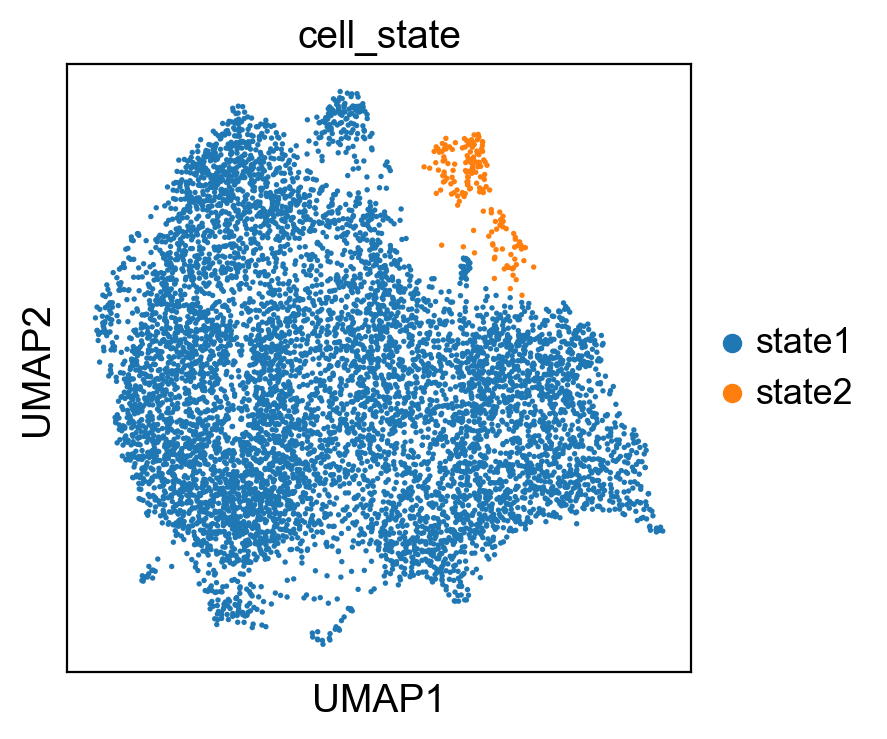

In [9]:
#filter out small cell state
sc.pl.umap(adata,color='cell_state')

In [12]:
#remove conditions with few cells
CELL_THRESHOLD=10
perturb_counts=adata.obs['gene'].value_counts()
keep_perturbations=list(perturb_counts.loc[perturb_counts>CELL_THRESHOLD].index)
print(keep_perturbations)

['unassigned', 'ARID1B', 'ARID2', 'control', 'SS18', 'DPF2', 'ARID1A,ARID1B', 'BRD9', 'GLTSCR1', 'GLTSCR1,GLTSCR1L', 'ARID1A', 'ARID2,BRD9', 'SMARCA2,SMARCA4', 'PBRM1', 'SMARCC1,SMARCC2', 'SMARCE1', 'GLTSCR1L', 'SMARCC2', 'SMARCA2', 'SMARCB1', 'SMARCD1', 'ARID2,SMARCB1', 'SMARCA4', 'ARID2,SMARCE1', 'SMARCD1,SMARCD2', 'SS18L', 'BRD9,GLTSCR1', 'ARID1A,ARID1B,BRD9', 'ARID1B,BRD9', 'PHF10', 'BCL7C', 'ARID1B,ARID2', 'SMARCC1', 'SMARCD2', 'BCL7A', 'ARID1A,ARID1B,ARID2', 'ARID1B,SMARCE1', 'ARID2,PBRM1', 'BRD9,GLTSCR1,GLTSCR1L', 'ARID1B,DPF2', 'BCL7B', 'BRD9,GLTSCR1L', 'SS18,SS18L', 'ARID1A,ARID1B,DPF2', 'ARID1B,SMARCB1', 'ARID1A,ARID1B,SMARCE1', 'ARID1A,ARID2', 'ARID1A,ARID1B,SMARCB1', 'ARID1A,BRD9', 'DPF2,PHF10', 'BRD7', 'ARID1A,DPF2', 'BRD7,PBRM1', 'ARID1B,control', 'ARID1B,GLTSCR1', 'ARID1A,SMARCB1', 'ARID1B,ARID2,BRD9', 'ARID1B,ARID2,SMARCB1', 'ARID1B,SS18']


In [14]:
#FILTERING
cell_state_cells=set(adata.obs_names[adata.obs['cell_state']=='state1'])
perturb_qc_cells=set(adata.obs_names[adata.obs['gene'].isin(keep_perturbations)]) #all guides pass QC in the combo, we picked them to do so
keep=list(cell_state_cells.intersection(perturb_qc_cells))
print(len(keep))

adata=adata[keep,:]
adata._init_as_actual(adata.copy())
adata

6891


AnnData object with n_obs × n_vars = 6891 × 20018
    obs: 'n_genes', 'batch', 'SMARCE1_1', 'DPF2_4', 'BCL7C_2', 'ARID2_1', 'NTC7_IG1144056', 'PHF10_1', 'SMARCA2_4', 'BCL7B_1', 'SMARCB1_5', 'ARID1B_4', 'NTC6_IG1216445', 'NTC1_IG345439', 'PBRM1_3', 'GLTSCR1_1', 'BCL7A_3', 'GLTSCR1L_3', 'SMARCC1_7', 'ARID1A_3', 'SMARCC2_3', 'SMARCA4_4', 'SS18_2', 'SMARCD2_3', 'BRD7_2', 'SMARCD1_4', 'SS18L_1', 'BRD9_2', 'SMARCB1', 'BRD7', 'PBRM1', 'BCL7A', 'PHF10', 'ARID1A', 'SS18', 'cell', 'BCL7C', 'BCL7B', 'SMARCC1', 'GLTSCR1', 'SMARCC2', 'control', 'DPF2', 'SMARCE1', 'SMARCA4', 'BRD9', 'GLTSCR1L', 'SS18L', 'ARID2', 'SMARCD2', 'SMARCD1', 'SMARCA2', 'ARID1B', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '1', '2', 'leiden', 'cell_state'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 's

In [15]:
adata.write(pref+'.guide_qc.filtered.h5ad')

Stopping point
==

In [20]:
adata=sc.read(pref+'.guide_qc.filtered.h5ad')
adata

Only considering the two last: ['.filtered', '.h5ad'].
Only considering the two last: ['.filtered', '.h5ad'].


AnnData object with n_obs × n_vars = 6891 × 20018
    obs: 'n_genes', 'batch', 'SMARCE1_1', 'DPF2_4', 'BCL7C_2', 'ARID2_1', 'NTC7_IG1144056', 'PHF10_1', 'SMARCA2_4', 'BCL7B_1', 'SMARCB1_5', 'ARID1B_4', 'NTC6_IG1216445', 'NTC1_IG345439', 'PBRM1_3', 'GLTSCR1_1', 'BCL7A_3', 'GLTSCR1L_3', 'SMARCC1_7', 'ARID1A_3', 'SMARCC2_3', 'SMARCA4_4', 'SS18_2', 'SMARCD2_3', 'BRD7_2', 'SMARCD1_4', 'SS18L_1', 'BRD9_2', 'SMARCB1', 'BRD7', 'PBRM1', 'BCL7A', 'PHF10', 'ARID1A', 'SS18', 'cell', 'BCL7C', 'BCL7B', 'SMARCC1', 'GLTSCR1', 'SMARCC2', 'control', 'DPF2', 'SMARCE1', 'SMARCA4', 'BRD9', 'GLTSCR1L', 'SS18L', 'ARID2', 'SMARCD2', 'SMARCD1', 'SMARCA2', 'ARID1B', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '1', '2', 'leiden', 'cell_state'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 's

In [21]:
#get variable genes, run linear model
adata=adata[:,adata.var_names[adata.var['highly_variable']]]
adata

View of AnnData object with n_obs × n_vars = 6891 × 1761
    obs: 'n_genes', 'batch', 'SMARCE1_1', 'DPF2_4', 'BCL7C_2', 'ARID2_1', 'NTC7_IG1144056', 'PHF10_1', 'SMARCA2_4', 'BCL7B_1', 'SMARCB1_5', 'ARID1B_4', 'NTC6_IG1216445', 'NTC1_IG345439', 'PBRM1_3', 'GLTSCR1_1', 'BCL7A_3', 'GLTSCR1L_3', 'SMARCC1_7', 'ARID1A_3', 'SMARCC2_3', 'SMARCA4_4', 'SS18_2', 'SMARCD2_3', 'BRD7_2', 'SMARCD1_4', 'SS18L_1', 'BRD9_2', 'SMARCB1', 'BRD7', 'PBRM1', 'BCL7A', 'PHF10', 'ARID1A', 'SS18', 'cell', 'BCL7C', 'BCL7B', 'SMARCC1', 'GLTSCR1', 'SMARCC2', 'control', 'DPF2', 'SMARCE1', 'SMARCA4', 'BRD9', 'GLTSCR1L', 'SS18L', 'ARID2', 'SMARCD2', 'SMARCD1', 'SMARCA2', 'ARID1B', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '1', '2', 'leiden', 'cell_state'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'me

In [23]:
adata.obs['gene'].value_counts()

unassigned               661
ARID1B                   583
ARID2                    404
control                  392
SS18                     388
DPF2                     334
ARID1A,ARID1B            255
BRD9                     238
GLTSCR1                  231
ARID1A                   173
GLTSCR1,GLTSCR1L         171
ARID2,BRD9               163
PBRM1                    157
SMARCA2,SMARCA4          156
SMARCC1,SMARCC2          140
SMARCC2                  133
SMARCE1                  131
GLTSCR1L                 131
SMARCA2                  124
SMARCB1                  112
SMARCD1                  107
SMARCA4                  105
ARID2,SMARCB1            103
ARID2,SMARCE1             99
SMARCD1,SMARCD2           87
SS18L                     82
BRD9,GLTSCR1              77
ARID1A,ARID1B,BRD9        65
ARID1B,BRD9               61
PHF10                     61
BCL7C                     59
SMARCD2                   56
SMARCC1                   55
ARID1B,ARID2              55
BCL7A         

In [32]:
def obs_split(adata_here,obs_of_interest,pref='',copy_adata=False):
    #convert one vector of obs into one obs for each encountered value 
    
    import pandas as pd
    import copy
    
    if copy_adata:
        adata_here=copy.deepcopy(adata_here)
    encountered_values=list(set(adata_here.obs[obs_of_interest]))
    cells=adata_here.obs_names
    df=pd.DataFrame(0,columns=encountered_values,index=cells)
    
    for val_idx,value in enumerate(encountered_values):
        df[value]=1.0*(adata_here.obs[obs_of_interest]==value)
    
    for col in df.columns:
        adata_here.obs[pref+col]=df[col]
    
    if copy_adata:
        return(adata_here)
    
obs_split(adata,'gene')

Trying to set attribute `.obs` of view, copying.


In [33]:
adata

AnnData object with n_obs × n_vars = 6891 × 1761
    obs: 'n_genes', 'batch', 'SMARCE1_1', 'DPF2_4', 'BCL7C_2', 'ARID2_1', 'NTC7_IG1144056', 'PHF10_1', 'SMARCA2_4', 'BCL7B_1', 'SMARCB1_5', 'ARID1B_4', 'NTC6_IG1216445', 'NTC1_IG345439', 'PBRM1_3', 'GLTSCR1_1', 'BCL7A_3', 'GLTSCR1L_3', 'SMARCC1_7', 'ARID1A_3', 'SMARCC2_3', 'SMARCA4_4', 'SS18_2', 'SMARCD2_3', 'BRD7_2', 'SMARCD1_4', 'SS18L_1', 'BRD9_2', 'SMARCB1', 'BRD7', 'PBRM1', 'BCL7A', 'PHF10', 'ARID1A', 'SS18', 'cell', 'BCL7C', 'BCL7B', 'SMARCC1', 'GLTSCR1', 'SMARCC2', 'control', 'DPF2', 'SMARCE1', 'SMARCA4', 'BRD9', 'GLTSCR1L', 'SS18L', 'ARID2', 'SMARCD2', 'SMARCD1', 'SMARCA2', 'ARID1B', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '1', '2', 'leiden', 'cell_state', 'SMARCA2,SMARCA4', 'ARID1B,ARID2,BRD9', 'ARID1A,ARID1B,SMARCB1', 'BRD7,PBRM1', 'ARID1A,ARID1B,DPF2', 'SMARCD1,SMARCD2', 'ARID1A,ARID1B,SMARCE1', 'BRD9,GLTSCR1', 'ARID1A,ARID2',

In [46]:
var_genes=adata.var_names[adata.var['highly_variable']]
covariates=['0', '1', '2',
            'pct_counts_mt', 'total_counts',
           ]
genes_perturbed=list(set(adata.obs['gene']).difference(set(['unassigned','control'])))

In [47]:
#run a few linear models, and pick a good one based on its prediction performance
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
my_rng=np.random.RandomState(1234)

adata_small=adata[:,var_genes].copy()
adata_small.raw=sc.AnnData(adata_small.raw[:,var_genes].to_adata())

In [48]:
genes_perturbed

['SS18L',
 'SMARCA2,SMARCA4',
 'ARID1B,ARID2,BRD9',
 'ARID1A,ARID1B,SMARCB1',
 'BRD7,PBRM1',
 'SMARCA2',
 'SS18',
 'SMARCD1',
 'ARID1A,ARID1B,DPF2',
 'BCL7B',
 'SMARCE1',
 'SMARCD1,SMARCD2',
 'ARID1A,ARID1B,SMARCE1',
 'BRD9,GLTSCR1',
 'ARID1A,ARID2',
 'PBRM1',
 'BCL7C',
 'ARID1A,ARID1B,ARID2',
 'GLTSCR1',
 'ARID1A,BRD9',
 'ARID2,SMARCE1',
 'ARID2,BRD9',
 'PHF10',
 'DPF2,PHF10',
 'ARID1B',
 'SMARCA4',
 'SMARCC1',
 'ARID1B,SMARCB1',
 'ARID1B,ARID2,SMARCB1',
 'ARID1A,SMARCB1',
 'ARID1B,SS18',
 'ARID1B,GLTSCR1',
 'BRD7',
 'SMARCD2',
 'BCL7A',
 'SS18,SS18L',
 'ARID2,PBRM1',
 'ARID1B,ARID2',
 'ARID1A,ARID1B,BRD9',
 'ARID1A',
 'BRD9,GLTSCR1L',
 'ARID2',
 'BRD9',
 'ARID2,SMARCB1',
 'ARID1B,BRD9',
 'ARID1A,ARID1B',
 'SMARCB1',
 'ARID1A,DPF2',
 'ARID1B,SMARCE1',
 'ARID1B,DPF2',
 'DPF2',
 'ARID1B,control',
 'SMARCC1,SMARCC2',
 'BRD9,GLTSCR1,GLTSCR1L',
 'GLTSCR1,GLTSCR1L',
 'SMARCC2',
 'GLTSCR1L']

splitting train    5512
test      690
valid     689
Name: train_valid_test, dtype: int64
Found 57/57 perturbations
Found 0/0 obs
Found 5/5 covariates
(6230, 57) (6230, 5) (6230, 1761)
train    5512
test      690
valid     689
Name: PS.alpha.0.0005.train_valid_test, dtype: int64
train 4982
valid 622
test 626

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FDDB4040940)
x (6230, 62)
model coeff (1761, 62)


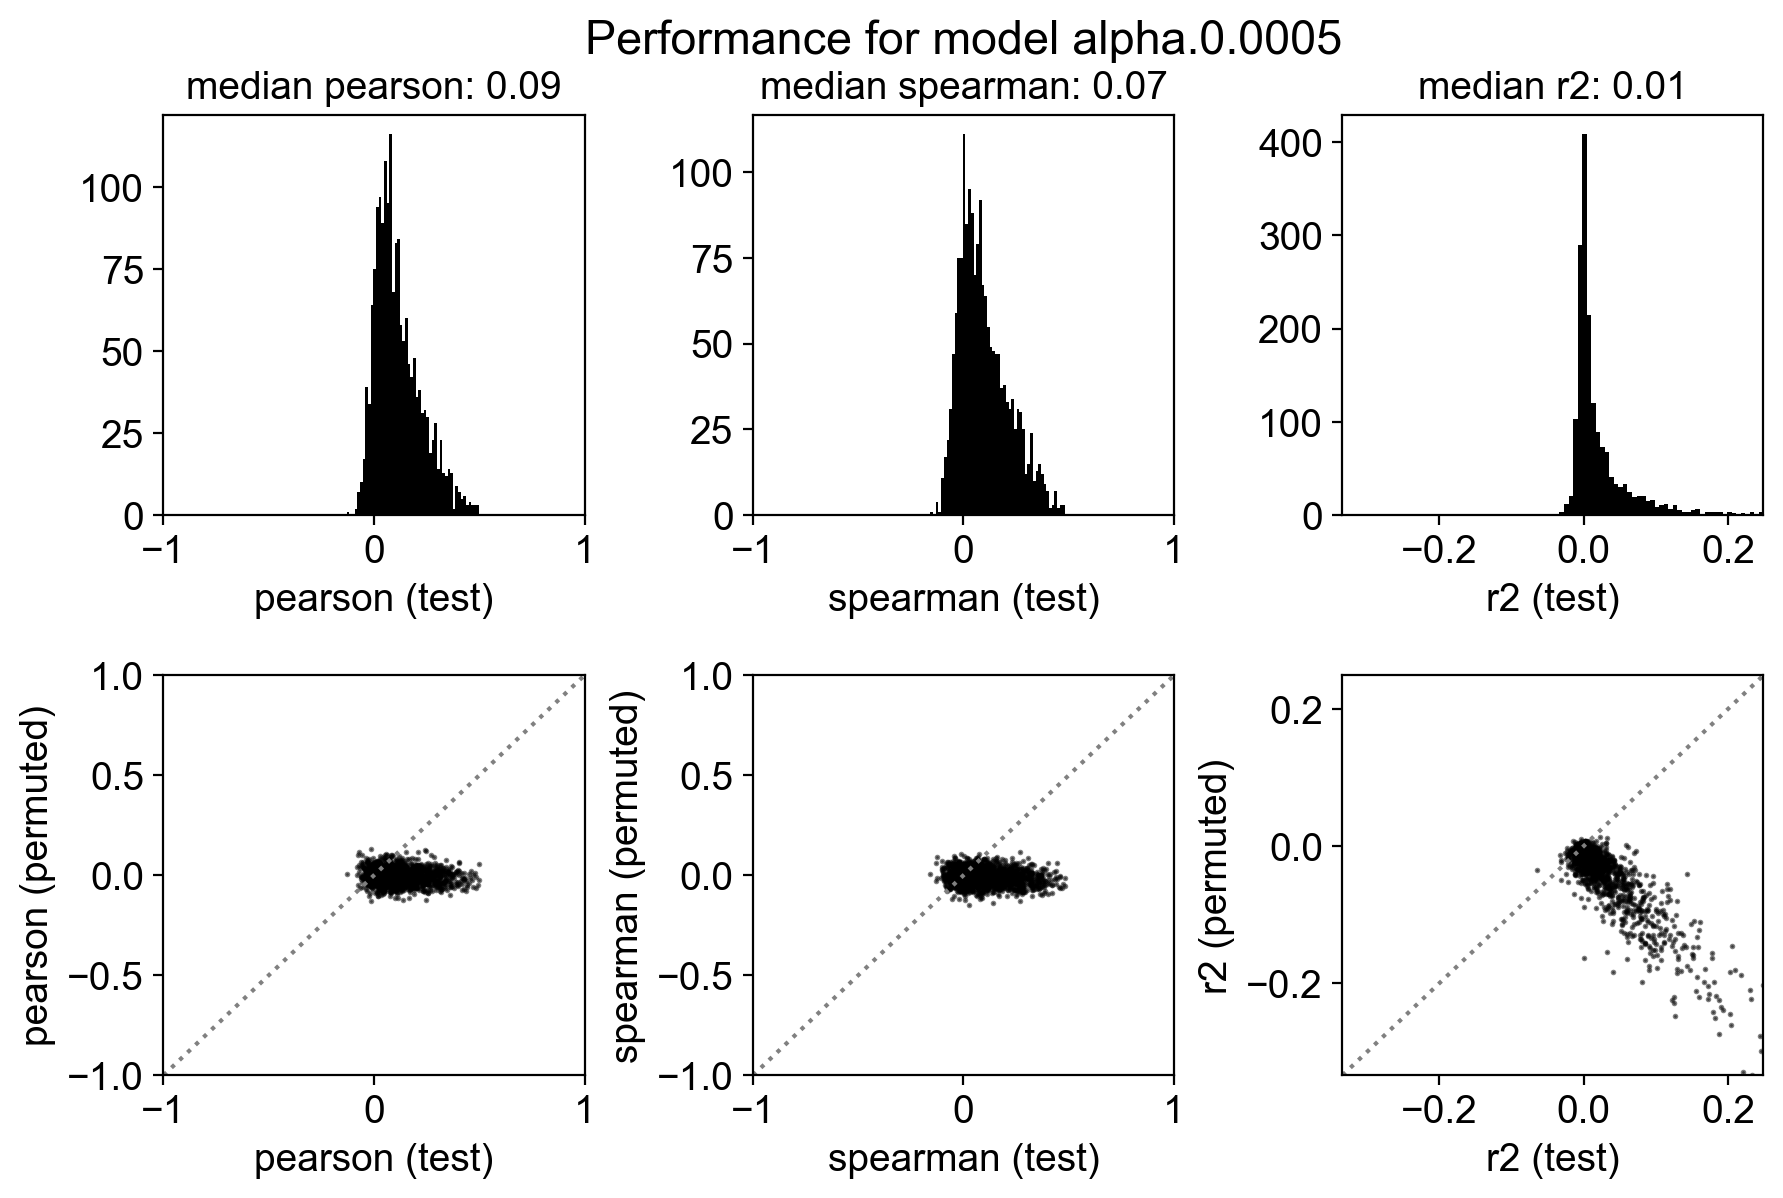

In [49]:
for alpha in [
              #0.00005,
              0.0005,
              #0.005,
              #0.05,
             ]:
    reg=linear_model.ElasticNet(l1_ratio=0.5,alpha=alpha,max_iter=10000,random_state=my_rng)
    modelname='alpha.'+str(alpha)

    perturb.lm.train_lm(adata_small,
        lm=reg,
        include_expression=True,
        y_obs=[],
        model_name=modelname,
        perturbations_list=genes_perturbed,
        covariates_list=covariates,
        my_rng=np.random.RandomState(1234),
        adjust=False,
         adjust_vars=[],
        copy_adata=False,
        keep_unassigned=False,
         control_names=['control'],
       use_raw=True)

    perturb.pl.plot_model_performance(adata_small,modelname)

The best model was 0.0005, equal to 0.00005.

In [50]:
#save all models
adata_small.write(pref+'.guide_qc.lm.h5ad')

... storing 'PS.alpha.0.0005.train_valid_test' as categorical


Model plots
==

In [51]:
adata=sc.read(pref+'.guide_qc.lm.h5ad')
adata

Only considering the two last: ['.lm', '.h5ad'].
Only considering the two last: ['.lm', '.h5ad'].


AnnData object with n_obs × n_vars = 6891 × 1761
    obs: 'n_genes', 'batch', 'SMARCE1_1', 'DPF2_4', 'BCL7C_2', 'ARID2_1', 'NTC7_IG1144056', 'PHF10_1', 'SMARCA2_4', 'BCL7B_1', 'SMARCB1_5', 'ARID1B_4', 'NTC6_IG1216445', 'NTC1_IG345439', 'PBRM1_3', 'GLTSCR1_1', 'BCL7A_3', 'GLTSCR1L_3', 'SMARCC1_7', 'ARID1A_3', 'SMARCC2_3', 'SMARCA4_4', 'SS18_2', 'SMARCD2_3', 'BRD7_2', 'SMARCD1_4', 'SS18L_1', 'BRD9_2', 'SMARCB1', 'BRD7', 'PBRM1', 'BCL7A', 'PHF10', 'ARID1A', 'SS18', 'cell', 'BCL7C', 'BCL7B', 'SMARCC1', 'GLTSCR1', 'SMARCC2', 'control', 'DPF2', 'SMARCE1', 'SMARCA4', 'BRD9', 'GLTSCR1L', 'SS18L', 'ARID2', 'SMARCD2', 'SMARCD1', 'SMARCA2', 'ARID1B', 'guide', 'guide.compact', 'gene', 'gene.compact', 'unassigned', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '0', '1', '2', 'leiden', 'cell_state', 'SMARCA2,SMARCA4', 'ARID1B,ARID2,BRD9', 'ARID1A,ARID1B,SMARCB1', 'BRD7,PBRM1', 'ARID1A,ARID1B,DPF2', 'SMARCD1,SMARCD2', 'ARID1A,ARID1B,SMARCE1', 'BRD9,GLTSCR1', 'ARID1A,ARID2',

In [52]:
modelname='alpha.0.0005'

In [53]:
var_genes=adata.var_names[adata.var['highly_variable']]
covariates=['0', '1', '2',
            'pct_counts_mt', 'total_counts',
           ]
genes_perturbed=list(set(adata.obs['gene']).difference(set(['unassigned','control'])))

In [54]:
coef=adata.uns['PS.'+modelname+'.coef']
coef.index=list(adata.var_names)
print(coef.shape)
print(coef.columns)
adata.uns['coef.gene2']=coef.T.loc[genes_perturbed,:]

(1761, 62)
Index(['SS18L', 'SMARCA2,SMARCA4', 'ARID1B,ARID2,BRD9',
       'ARID1A,ARID1B,SMARCB1', 'BRD7,PBRM1', 'SMARCA2', 'SS18', 'SMARCD1',
       'ARID1A,ARID1B,DPF2', 'BCL7B', 'SMARCE1', 'SMARCD1,SMARCD2',
       'ARID1A,ARID1B,SMARCE1', 'BRD9,GLTSCR1', 'ARID1A,ARID2', 'PBRM1',
       'BCL7C', 'ARID1A,ARID1B,ARID2', 'GLTSCR1', 'ARID1A,BRD9',
       'ARID2,SMARCE1', 'ARID2,BRD9', 'PHF10', 'DPF2,PHF10', 'ARID1B',
       'SMARCA4', 'SMARCC1', 'ARID1B,SMARCB1', 'ARID1B,ARID2,SMARCB1',
       'ARID1A,SMARCB1', 'ARID1B,SS18', 'ARID1B,GLTSCR1', 'BRD7', 'SMARCD2',
       'BCL7A', 'SS18,SS18L', 'ARID2,PBRM1', 'ARID1B,ARID2',
       'ARID1A,ARID1B,BRD9', 'ARID1A', 'BRD9,GLTSCR1L', 'ARID2', 'BRD9',
       'ARID2,SMARCB1', 'ARID1B,BRD9', 'ARID1A,ARID1B', 'SMARCB1',
       'ARID1A,DPF2', 'ARID1B,SMARCE1', 'ARID1B,DPF2', 'DPF2',
       'ARID1B,control', 'SMARCC1,SMARCC2', 'BRD9,GLTSCR1,GLTSCR1L',
       'GLTSCR1,GLTSCR1L', 'SMARCC2', 'GLTSCR1L', '0', '1', '2',
       'pct_counts_mt', 'total_cou

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


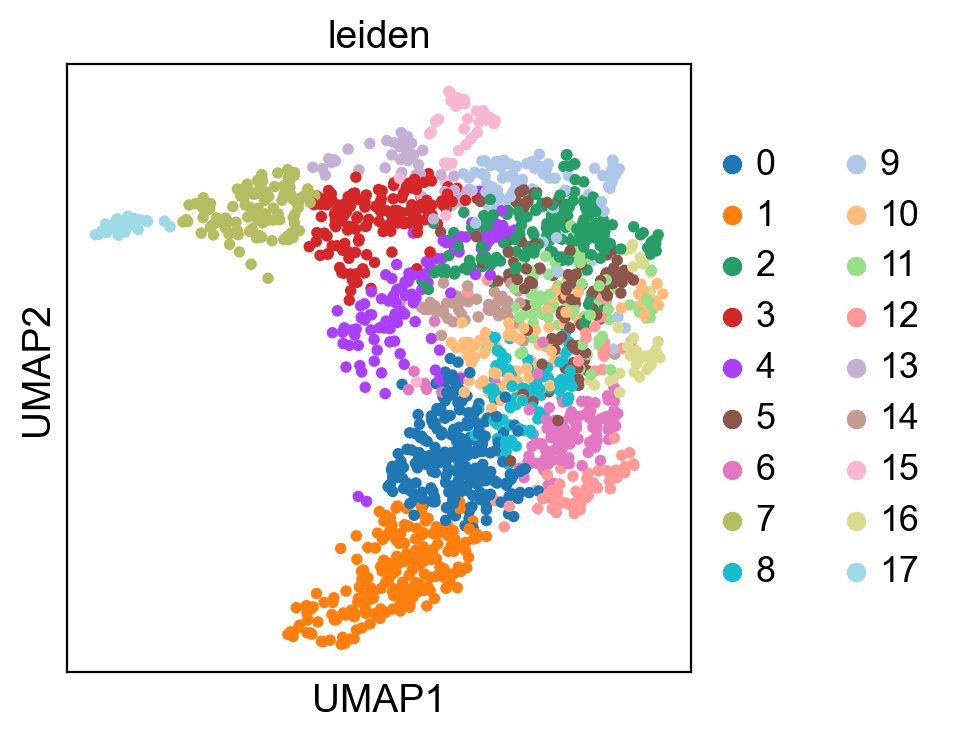

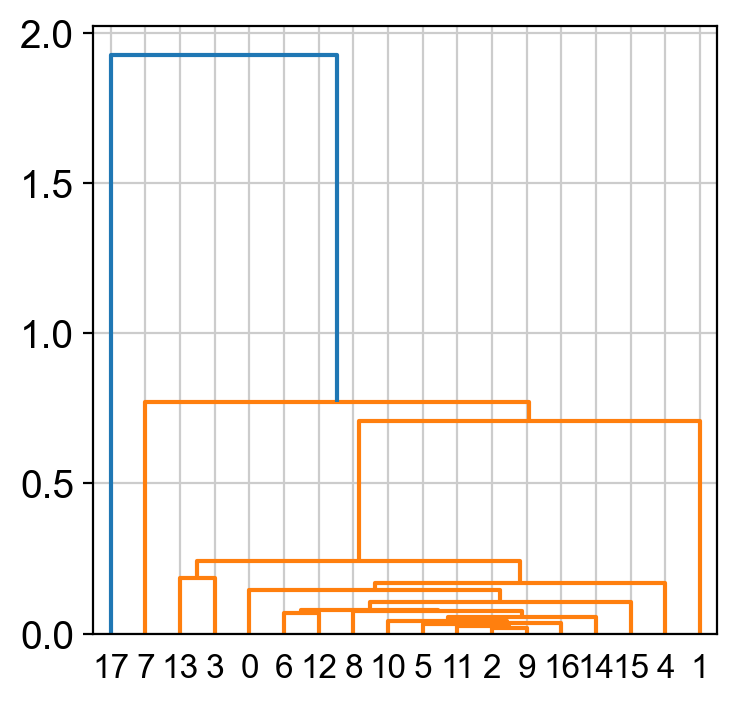

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


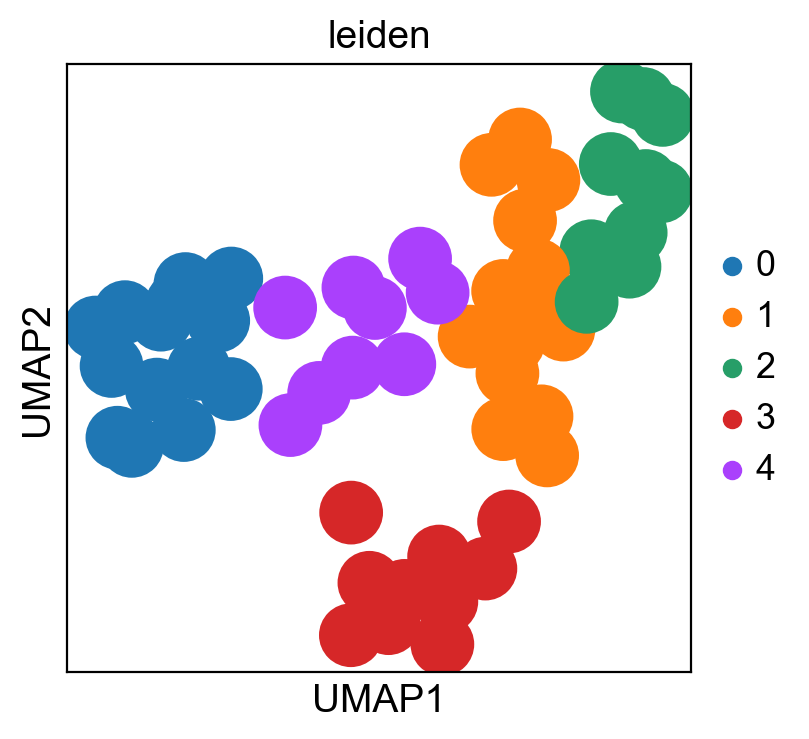

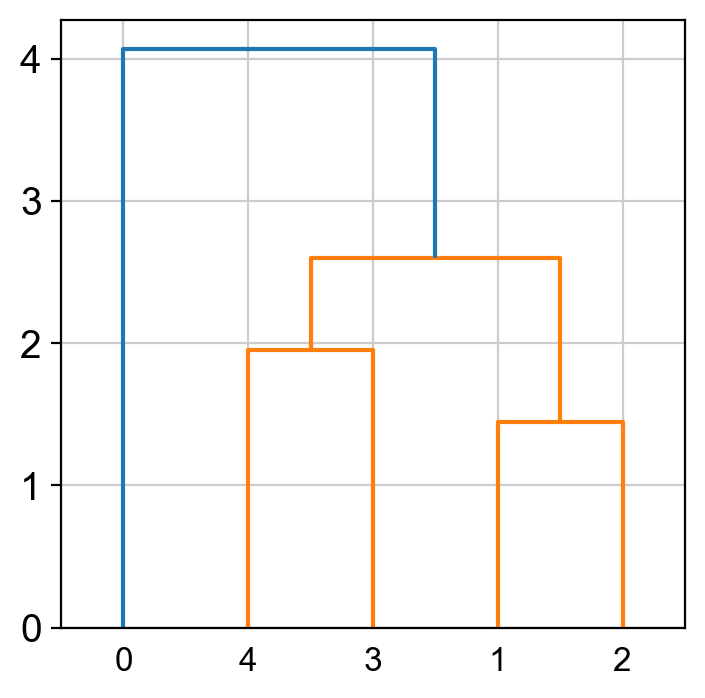

In [59]:
perturb.tl.gene_programs_and_perturbation_modules(adata,
                                                  input_type='coef',
                                                  perturbation_name='gene2',
                                           n_neighbors_programs=5,
                                                  n_neighbors_modules=5,
                                                  cluster_within=False,
                                                  copy=False,cmap_programs='Set2',
                                                  cmap_modules='Set2')

In [60]:
n='coef'
sc_bulk=adata.uns[n+'.gene2'].T.loc[adata.var_names,:]
sc_bulk['module']=adata.var[n+'.gene2.program']
sc_bulk=sc_bulk.sort_values(by='module')
sc_bulk=sc_bulk.drop(columns=['module'])
gene_pro_color=pd.DataFrame({'gene program':adata.var[n+'.gene2.program_color']},
                           index=adata.var_names)

In [61]:
pro_variable=n+'.gene2.program'
programs=list(set(adata.var[pro_variable]))
print(programs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [62]:
for pro in programs:
    sc.tl.score_genes(adata, 
                      list(adata.var_names[adata.var[pro_variable]==pro]), 
                      ctrl_size=50, 
                      score_name='P'+str(pro),
                      use_raw=True)

computing score 'P0'
    finished: added
    'P0', score of gene set (adata.obs).
    90 total control genes are used. (0:00:00)
computing score 'P1'
    finished: added
    'P1', score of gene set (adata.obs).
    293 total control genes are used. (0:00:00)
computing score 'P2'
    finished: added
    'P2', score of gene set (adata.obs).
    620 total control genes are used. (0:00:00)
computing score 'P3'
    finished: added
    'P3', score of gene set (adata.obs).
    808 total control genes are used. (0:00:00)
computing score 'P4'
    finished: added
    'P4', score of gene set (adata.obs).
    993 total control genes are used. (0:00:00)
computing score 'P5'
    finished: added
    'P5', score of gene set (adata.obs).
    1034 total control genes are used. (0:00:00)
computing score 'P6'
    finished: added
    'P6', score of gene set (adata.obs).
    1038 total control genes are used. (0:00:00)
computing score 'P7'
    finished: added
    'P7', score of gene set (adata.obs).
    109

In [69]:
bulk_programs,p=perturb.pp.obs_mean_with_sig(adata,obs_list=['P'+str(x) for x in programs],
                                             ref='control',
                               grouping_variable='gene',fdr=0.1,multiple_testing_method='fdr_bh')


P0
P1
P2
P3
P4
P5
P6
P7
P8
P9
P10
P11
P12
P13
P14
P15
P16
P17


Index(['P0', 'P1', 'P2', 'P3', 'P16', 'P14', 'P11', 'P12', 'P15', 'P13', 'P9',
       'P10', 'P8', 'P5', 'P6', 'P7', 'P4', 'P17'],
      dtype='object')

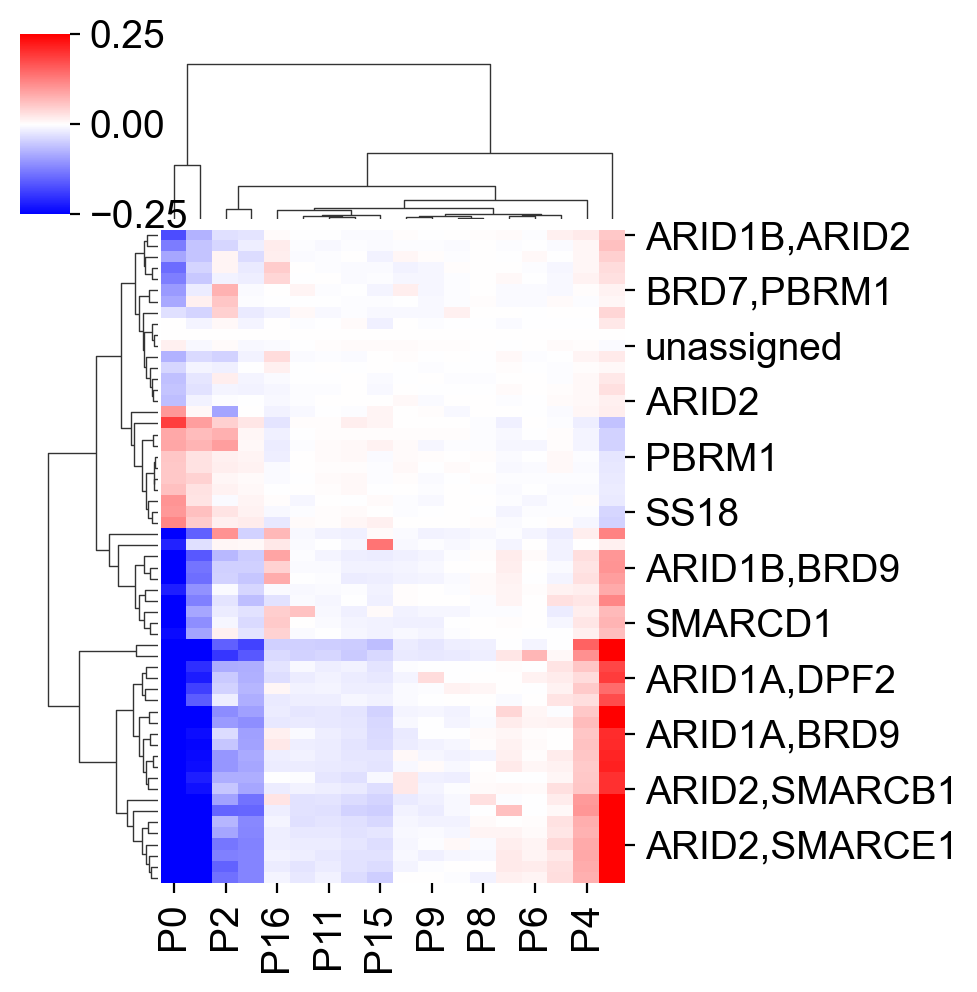

In [70]:
from scipy.cluster import hierarchy
import seaborn as sns

col_Z = hierarchy.linkage(bulk_programs.T,
                     optimal_ordering=True,
                          metric='cityblock',
                     method='complete',
                         )

x=0.25
g=sns.clustermap(bulk_programs,cmap='bwr',vmin=-x,vmax=x,
              figsize=(5,5),col_linkage=col_Z,
              )
sorted_programs=bulk_programs.iloc[:,g.dendrogram_col.reordered_ind].columns
sorted_programs

In [71]:
#reorder sc_bulk and rename programs
import re

pro_rename={}
for i in range(len(sorted_programs)):
    pro_rename['.P'+str(i)]=sorted_programs[i]
print(pro_rename)

adata.var['new_program']='na'
new_sc_bulk=pd.DataFrame(columns=sc_bulk.columns)
for new_p in range(len(sorted_programs)):
    old_p=pro_rename['.P'+str(new_p)]
    print(old_p)
    genes_here=list(adata.var_names[adata.var[pro_variable]==int(re.sub('P','',old_p))])
    print(genes_here[:5])
    adata.var['new_program'].loc[genes_here]='P'+str(new_p)
    new_sc_bulk_here=sc_bulk.loc[genes_here,:]
    new_sc_bulk=pd.concat([new_sc_bulk,new_sc_bulk_here],axis=0)
    adata.obs['.P'+str(new_p)]=adata.obs[old_p]

{'.P0': 'P0', '.P1': 'P1', '.P2': 'P2', '.P3': 'P3', '.P4': 'P16', '.P5': 'P14', '.P6': 'P11', '.P7': 'P12', '.P8': 'P15', '.P9': 'P13', '.P10': 'P9', '.P11': 'P10', '.P12': 'P8', '.P13': 'P5', '.P14': 'P6', '.P15': 'P7', '.P16': 'P4', '.P17': 'P17'}
P0
['RANBP1', 'HSPD1', 'MT1G', 'PHGDH', 'MT2A']
P1
['RAB13', 'SET', 'BRIX1', 'JPT1', 'SMC4']
P2
['TUBA1C', 'CEP55', 'CENPE', 'CENPA', 'NUSAP1']
P3
['PRDX1', 'CBX6', 'RANGAP1', 'SOX18', 'SOX4']
P16
['ZFP36L2', 'ZNF703', 'PTGDS', 'LGALS1', 'PLAAT3']
P14
['LENG8-AS1', 'C21orf58', 'SLC5A3', 'CCNF', 'EPS8L1']
P11
['AC018926.2', 'ENC1', 'BMF', 'OSR2', 'MIR762HG']
P12
['ZNF761', 'KDM7A', 'AL627171.1', 'RABGEF1', 'SLC12A5']
P15
['DAB2', 'LPXN', 'PRKCA', 'AC058791.1', 'AMN']
P13
['RBKS', 'AC253572.2', 'C18orf65', 'RGCC', 'RASD1']
P9
['AC110769.2', 'PRDM1', 'PHETA1', 'TRGC1', 'SLC37A2']
P10
['BTN3A1', 'SH3BGRL2', 'MAGIX', 'AL353622.1', 'IZUMO4']
P8
['VEGFB', 'GNPDA1', 'B3GALT4', 'OSM', 'TP53TG1']
P5
['SLC4A8', 'DUSP10', 'HLA-DMA', 'DUSP6', 'GCC2']
P

/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/ursuo/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [72]:
adata.var['new_program.color']=perturb.tl.cat2color(adata.var['new_program'],color_map=None,cmap='Set2')

Index(['ARID1A,ARID1B,SMARCB1', 'ARID1A,ARID1B,SMARCE1', 'ARID2,SMARCE1',
       'SMARCE1', 'ARID1B,SMARCE1', 'ARID1A,ARID1B,DPF2', 'ARID1B,SMARCB1',
       'ARID1A', 'ARID1A,ARID1B', 'SMARCC1,SMARCC2', 'ARID1A,ARID2',
       'ARID1A,ARID1B,ARID2', 'SMARCD1,SMARCD2', 'ARID1B,ARID2,SMARCB1',
       'ARID1A,SMARCB1', 'SMARCB1', 'ARID2,SMARCB1', 'ARID1A,ARID1B,BRD9',
       'ARID1A,BRD9', 'SMARCC1', 'SMARCA4', 'SMARCA2,SMARCA4', 'SMARCD2',
       'ARID1A,DPF2', 'ARID1B,GLTSCR1', 'ARID1B,DPF2', 'DPF2,PHF10',
       'ARID1B,control', 'BRD7,PBRM1', 'SMARCC2', 'ARID1B', 'GLTSCR1',
       'SMARCA2', 'ARID2,PBRM1', 'ARID2', 'ARID1B,ARID2', 'ARID2,BRD9',
       'BRD9,GLTSCR1L', 'SMARCD1', 'GLTSCR1,GLTSCR1L', 'BRD9', 'BRD9,GLTSCR1',
       'ARID1B,BRD9', 'BRD9,GLTSCR1,GLTSCR1L', 'ARID1B,ARID2,BRD9', 'DPF2',
       'SS18,SS18L', 'ARID1B,SS18', 'BRD7', 'PBRM1', 'BCL7A', 'BCL7C',
       'GLTSCR1L', 'BCL7B', 'SS18L', 'SS18', 'PHF10'],
      dtype='object')


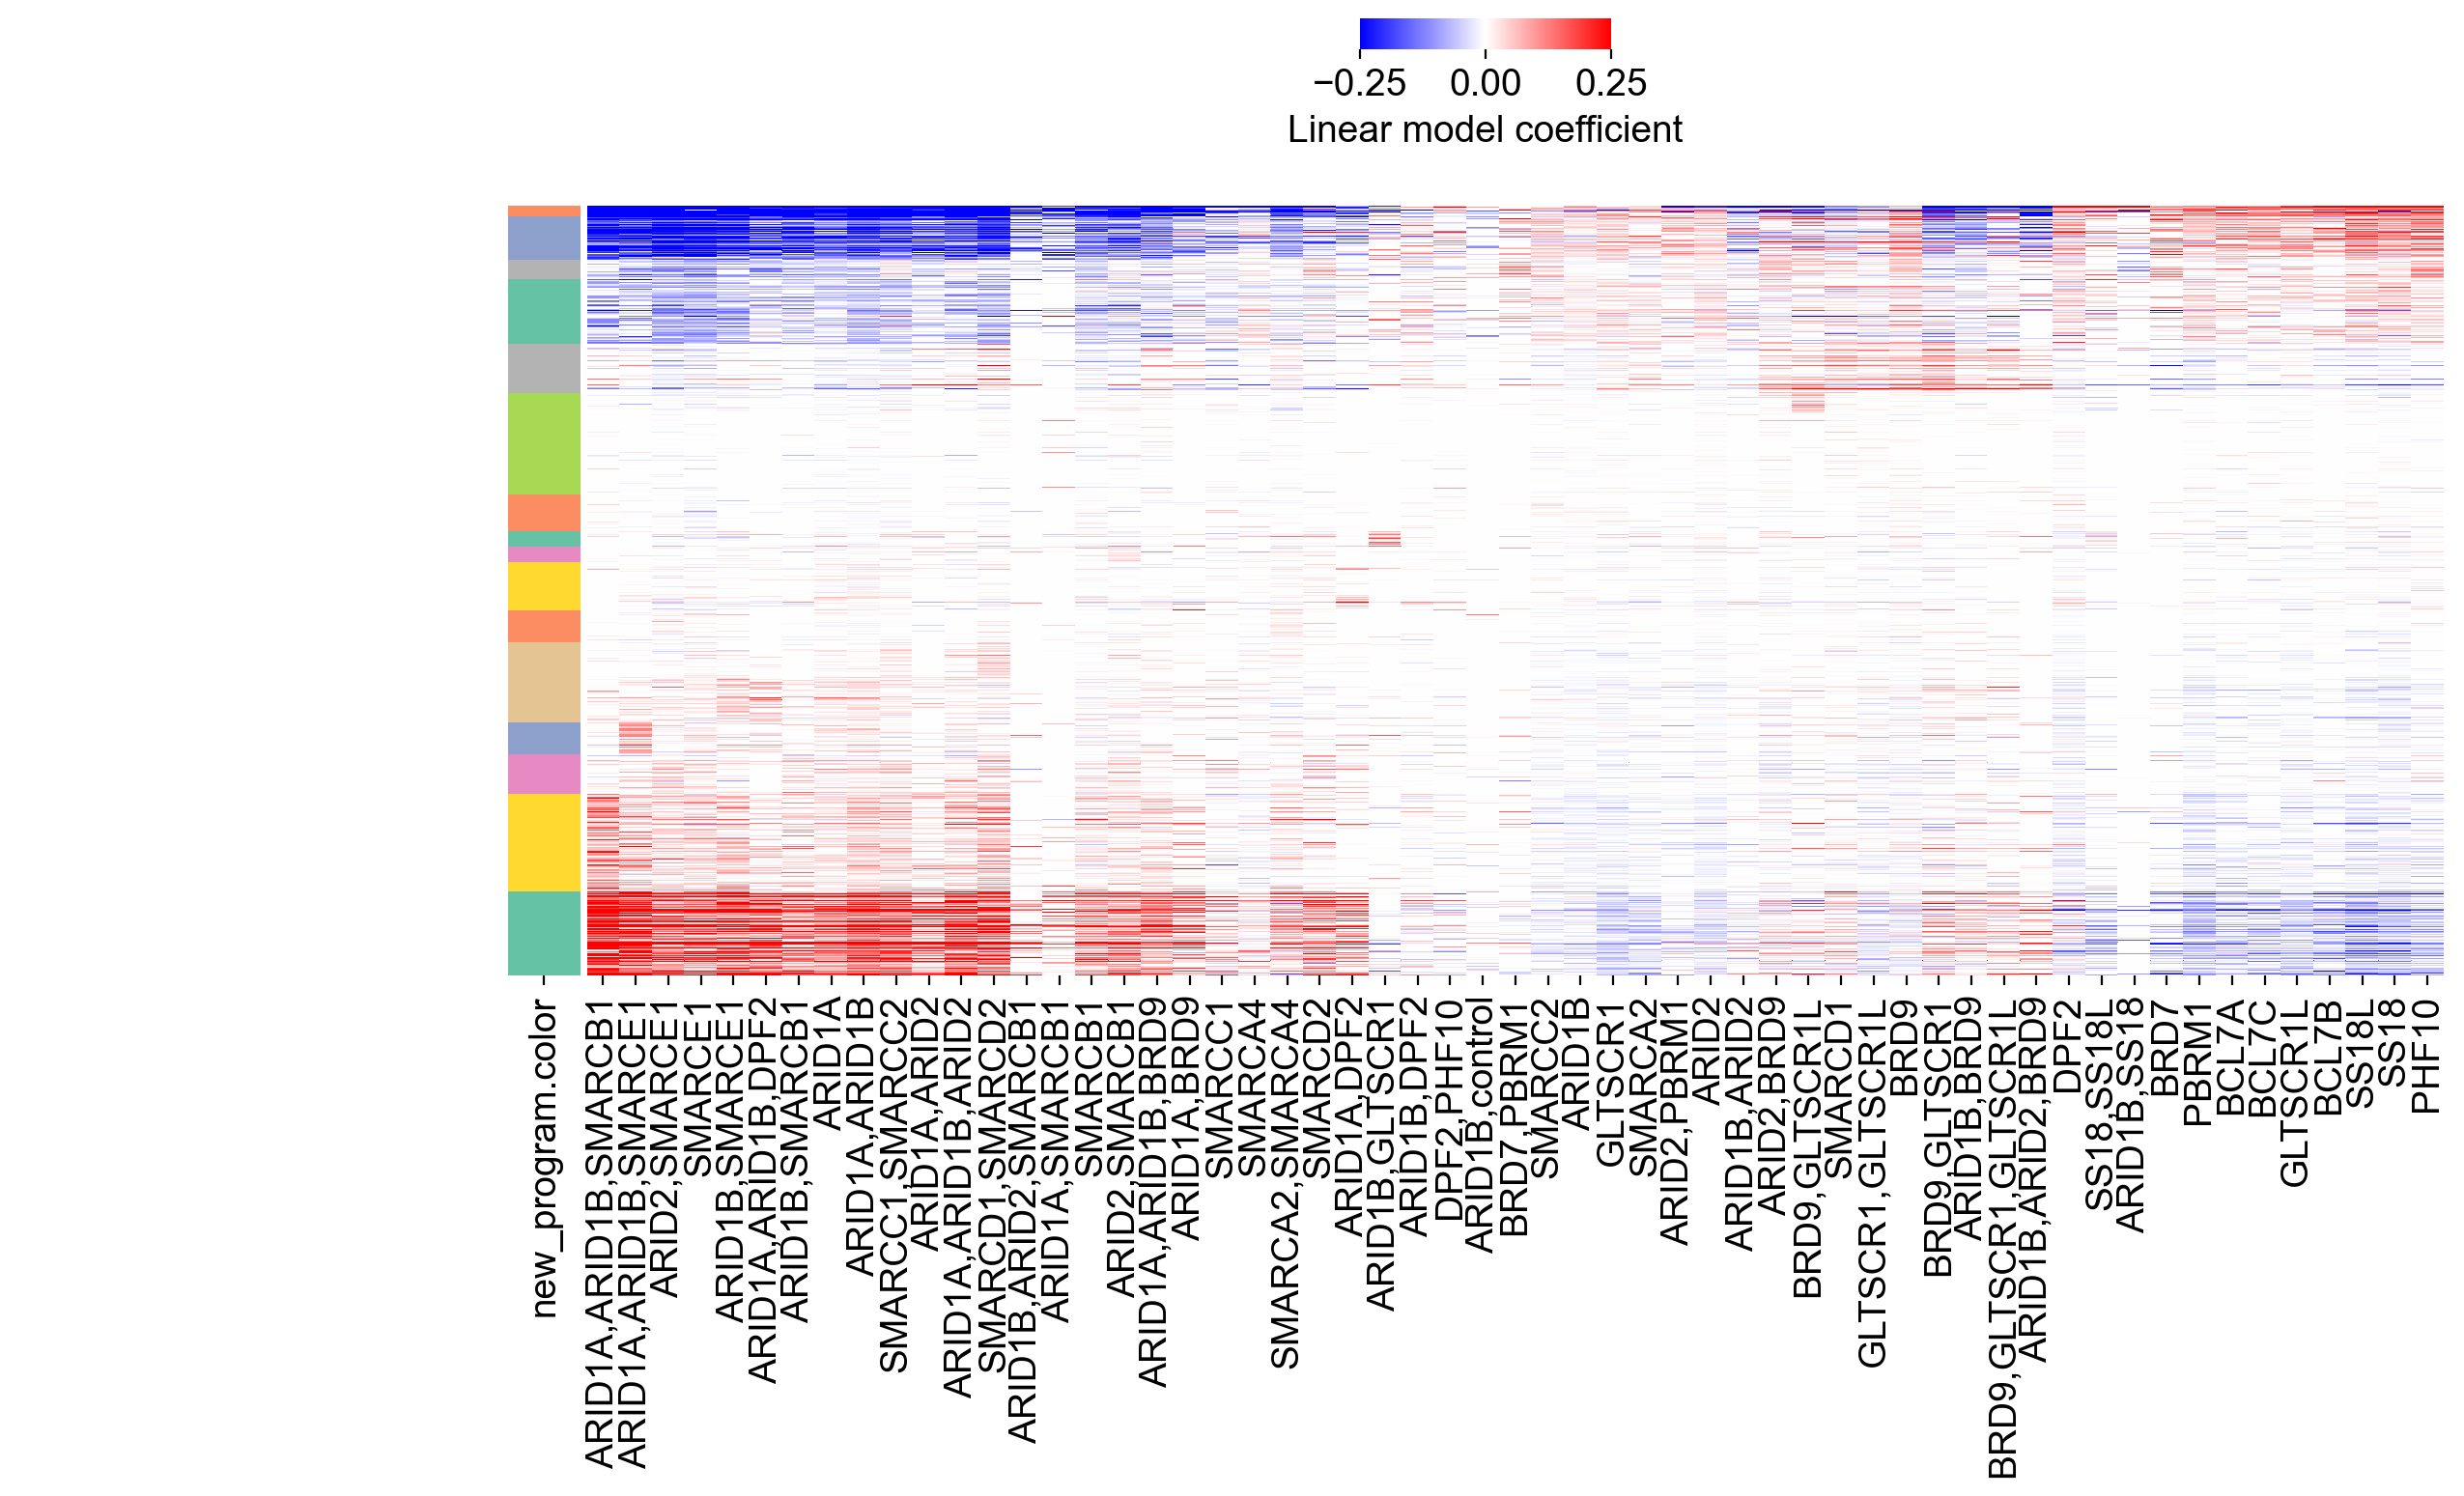

In [77]:
col_Z = hierarchy.linkage(new_sc_bulk.T,
                     optimal_ordering=True,
                     method='complete',
                         )

x=0.25
g=sns.clustermap(new_sc_bulk,col_linkage=col_Z,
               row_cluster=False,col_cluster=True,
               xticklabels=True,
                 yticklabels=False,
               figsize=(13,8),
               cbar_pos=(0.55, 0.95, 0.1, 0.02),
                 cbar_kws={'orientation':'horizontal',
                "label": "Linear model coefficient",
                'ticks':[-x,0,x]},
               cmap='bwr',vmin=-x,vmax=x,
              row_colors=adata.var['new_program.color'],
                )
g.ax_col_dendrogram.set_visible(False)
plt.savefig(FIGS+'combo.regMat.'+modelname+'.heatmap.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'combo.regMat.'+modelname+'.heatmap.png',transparent=True,bbox_inches='tight')

sorted_perturbs=sc_bulk.iloc[:,g.dendrogram_col.reordered_ind].columns
print(sorted_perturbs)

In [83]:
bulk_programs2,p2=perturb.pp.obs_mean_with_sig(adata,obs_list=['.P'+str(x) for x in programs],
                                             ref='control',
                               grouping_variable='gene',fdr=0.1,multiple_testing_method='fdr_bh')


.P0
.P1
.P2
.P3
.P4
.P5
.P6
.P7
.P8
.P9
.P10
.P11
.P12
.P13
.P14
.P15
.P16
.P17


/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sizes[sizes<best_p]=best_p
/Users/ursuo/Documents/research/baf/code/perturbseq/perturbseq/pl.py:270: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.bwr),


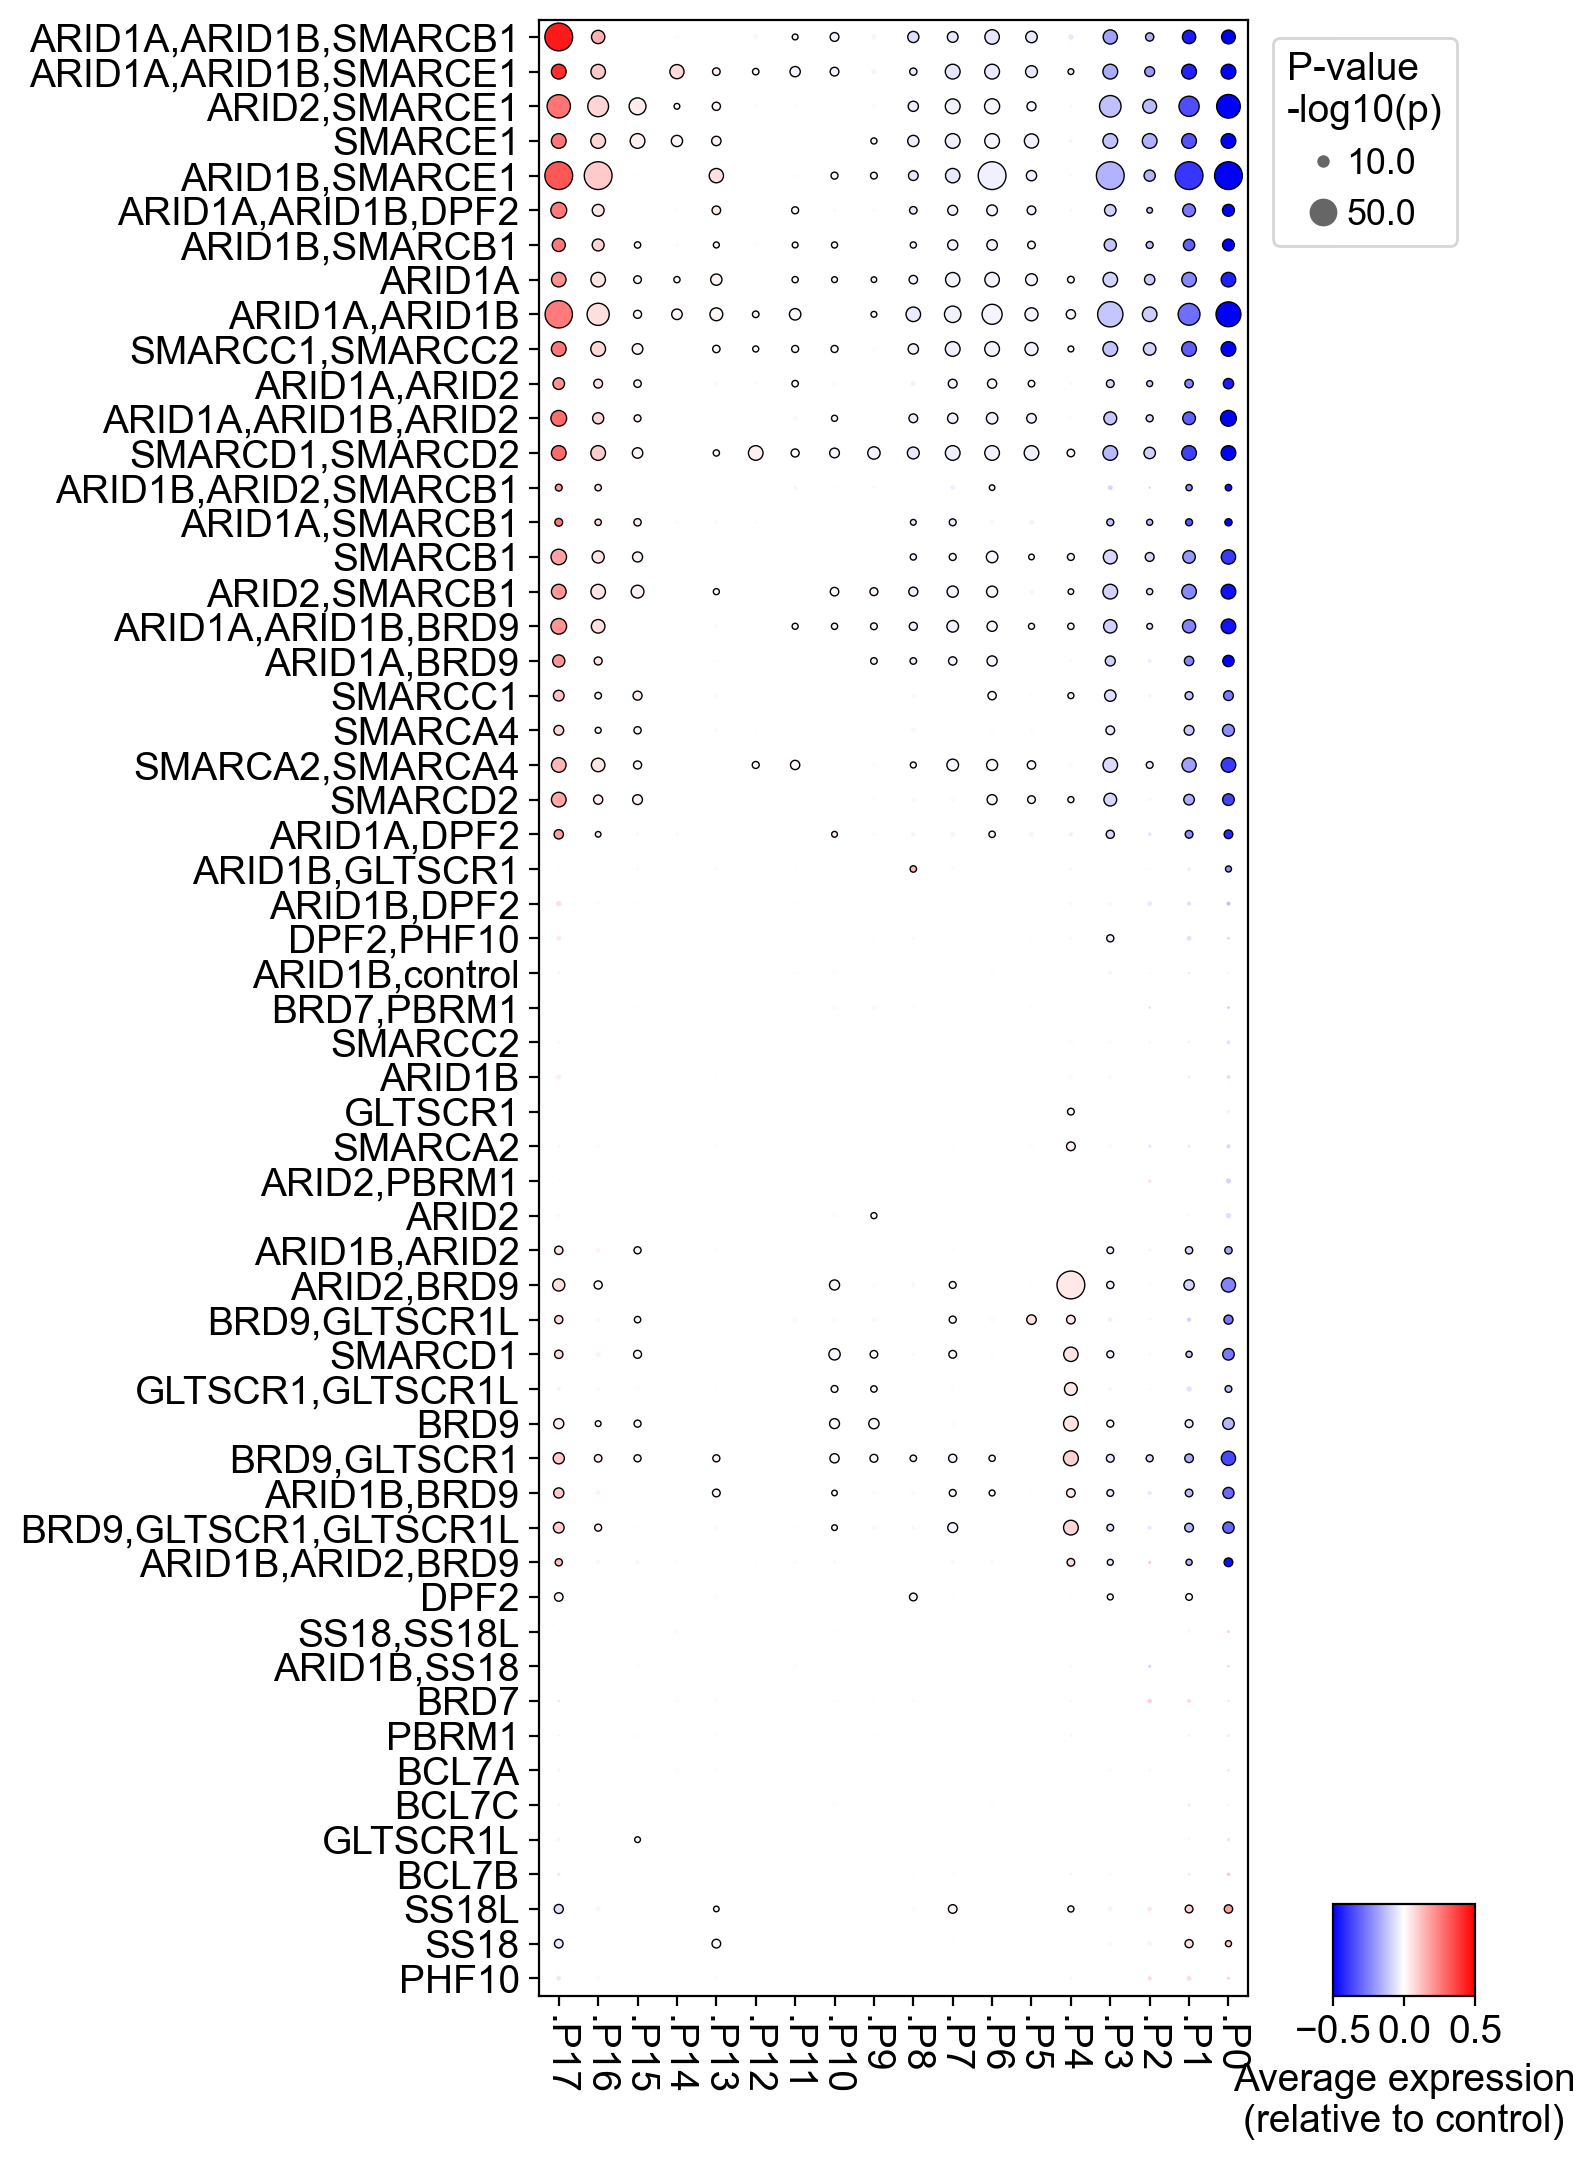

In [87]:
perturb.pl.dotplot2(bulk_programs2,p2,
                    ['.P'+str(x) for x in programs],
                    sorted_perturbs,
                    w=6,h=13,best_p=1e-50,
        title='Average expression\n(relative to control)')

plt.savefig(FIGS+'combo.regMat.'+modelname+'.programsDotplot.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'combo.regMat.'+modelname+'.programsDotplot.png',transparent=True,bbox_inches='tight')

In [88]:
adata.write('test.h5ad')

... storing 'coef.gene2.program_color' as categorical
... storing 'new_program' as categorical
... storing 'new_program.color' as categorical


In [89]:
adata.write(pref+'.guide_qc.lm.processed.h5ad')